# Single Run Analysis

Notebook presenting the complete analysis for a single run (run 395). 

In [1]:
import nbimporter
import prepData as prep
import fitFunc as fits
import Statistics as stat

import matplotlib.pyplot as plt
import numpy as np 

## Table of Contents

1. [Load Dataset](#load) <br>
2. [Preliminary Fits](#fits) <br>
    2.1. [Backgroun Fit](#fits_bkg) <br>
    2.2. [Signal Fit](#fits_sig) <br>
3. [Statistical Analysis](#stats) <br>
    3.1. [Significance](#stats_sign) <br>
    3.2. [Confidence Interval](#stats_ci) <br>

## 1. Load Dataset <a name="load"></a>

Load data and prepare it for further analysis using code defined in the "prepData" notebook.

In [3]:
data,center,length = prep.load_dataset("db/AnalyzedDataFFT_Run_394_sliced.xlsx")
freq, fft, weights, ref, N = prep.prep_data(data,center, length=length)

Text(0, 0.5, 'FFT')

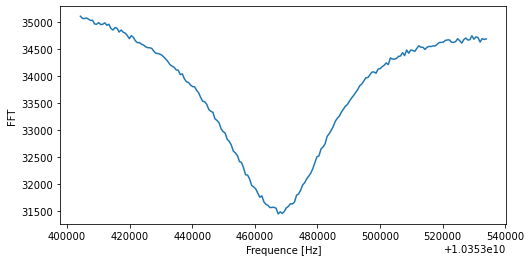

In [4]:
fig = plt.figure(figsize=(8, 4))
plt.plot(freq, fft)
plt.xlabel('Frequence [Hz]')
plt.ylabel('FFT')

## 2. Preliminary Fits <a name="fits"></a>

### 2.1. Background Fit <a name="fits_bkg"></a>

As a preliminary check, we will fit the background function

$$exp \left( 2 \cdot \frac{|x - a+ib|^2}{|x - c+id|^2} + f \cdot (x - c) \right)$$

and study the distribution of residuals.

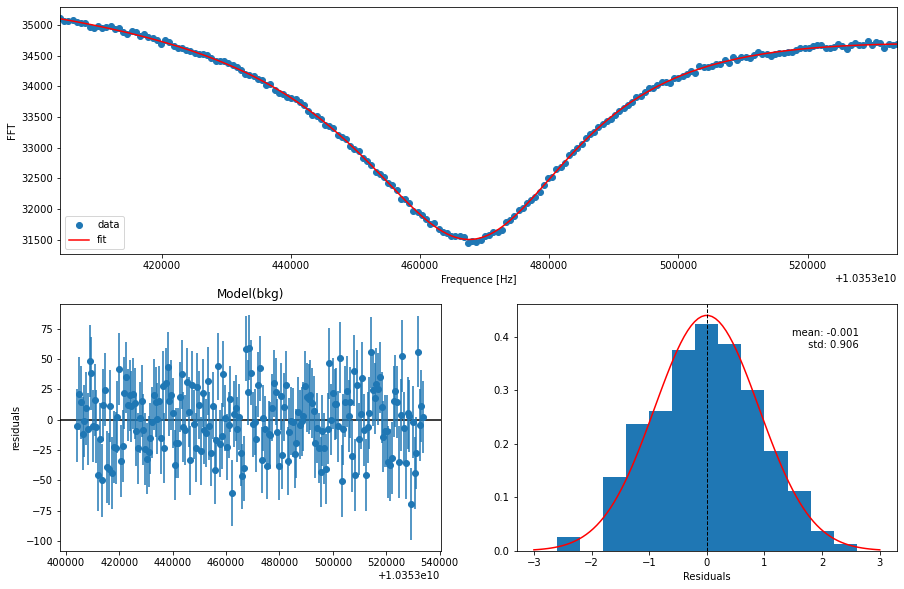

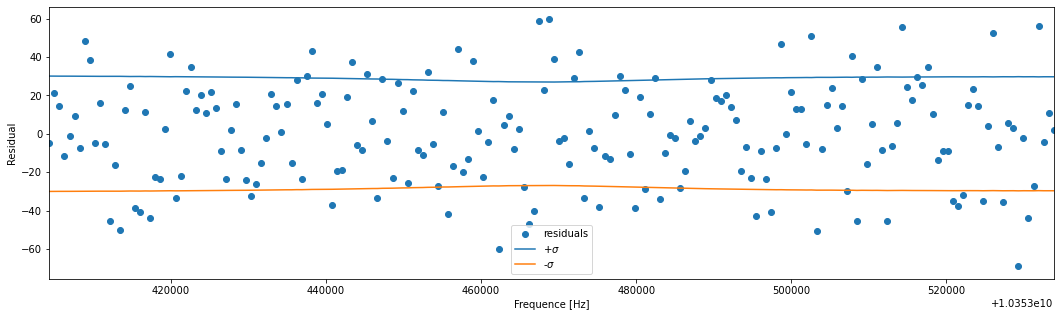

In [5]:
res_bkg = fits.fit_bkg(freq, fft, weights, center, ref)
fits.plot_fit(freq, fft, weights, res_bkg)

### 2.1. Signal Fit <a name="fits_sig"></a>

We will now fit the data with a gaussian signal over the background

$$\mu \cdot exp \left( -\frac{1}{2} \frac{(x - x_0)^2}{\sigma^2} \right)$$

using every possible frequency as the centre of the signal $x_0$.

In [14]:
bkg_params = res_bkg.best_values
res_sig = fits.fit_sig(x=freq, y=fft, w=weights, x_0=freq[199]+50000,
                           init_params=bkg_params, signal=fits.signal_gauss, par_vary=False)

In [17]:
plt.plot(freq,res_sig.best_fit

array([35105.33814169, 35092.98045074, 35080.4189933 , 35067.64719663,
       35054.65823291, 35041.44500839, 35028.00015191, 35014.31600264,
       35000.38459761, 34986.19765877, 34971.74657902, 34957.02240809,
       34942.01583786, 34926.71718663, 34911.11638319, 34895.20295027,
       34878.96598692, 34862.39415068, 34845.47563914, 34828.19817033,
       34810.54896304, 34792.51471644, 34774.0815887 , 34755.23517545,
       34735.96048785, 34716.24192954, 34696.06327385, 34675.40764063,
       34654.25747237, 34632.59451077, 34610.39977346, 34587.65353035,
       34564.33528113, 34540.42373346, 34515.89678168, 34490.7314875 ,
       34464.90406261, 34438.38985294, 34411.16332647, 34383.19806467,
       34354.46675754, 34324.94120453, 34294.59232173, 34263.39015564,
       34231.30390639, 34198.30196111, 34164.35193843, 34129.42074752,
       34093.47466322, 34056.47941871, 34018.40032021, 33979.20238616,
       33938.85051302, 33897.3096737 , 33854.54515181, 33810.52281523,
      

In [5]:
bkg_params = res_bkg.best_values

mu_fit = np.empty(len(freq))
for i in range(len(freq)):
    res_sig = fits.fit_sig(x=freq, y=fft, w=weights, x_0=freq[i],
                           init_params=bkg_params, signal=fits.signal_gauss, par_vary=False)
    mu_fit[i] = res_sig.best_values["mu"]

Text(0, 0.5, '$\\hat{\\mu}$')

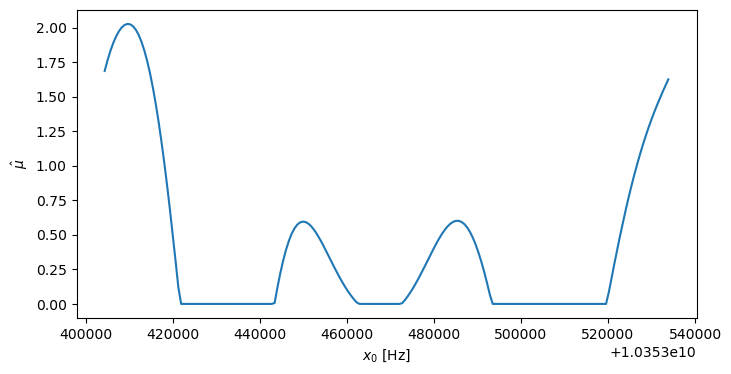

In [6]:
fig = plt.figure(figsize=(8, 4))
plt.plot(freq, mu_fit)
plt.xlabel(r'$x_0$ [Hz]')
plt.ylabel(r'$\hat{\mu}$')

Let us now check the goodness of the fits, using the one returning the maximum $\hat{\mu}$ as an example.

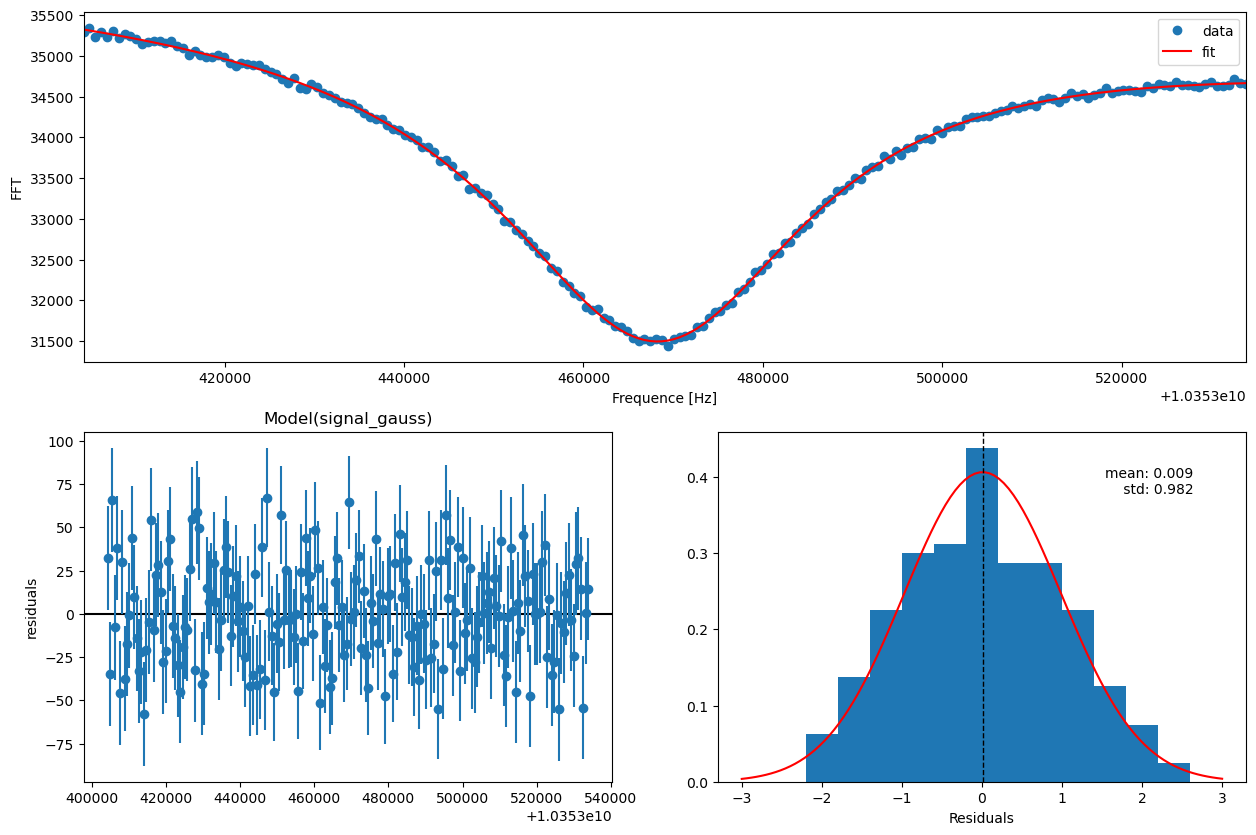

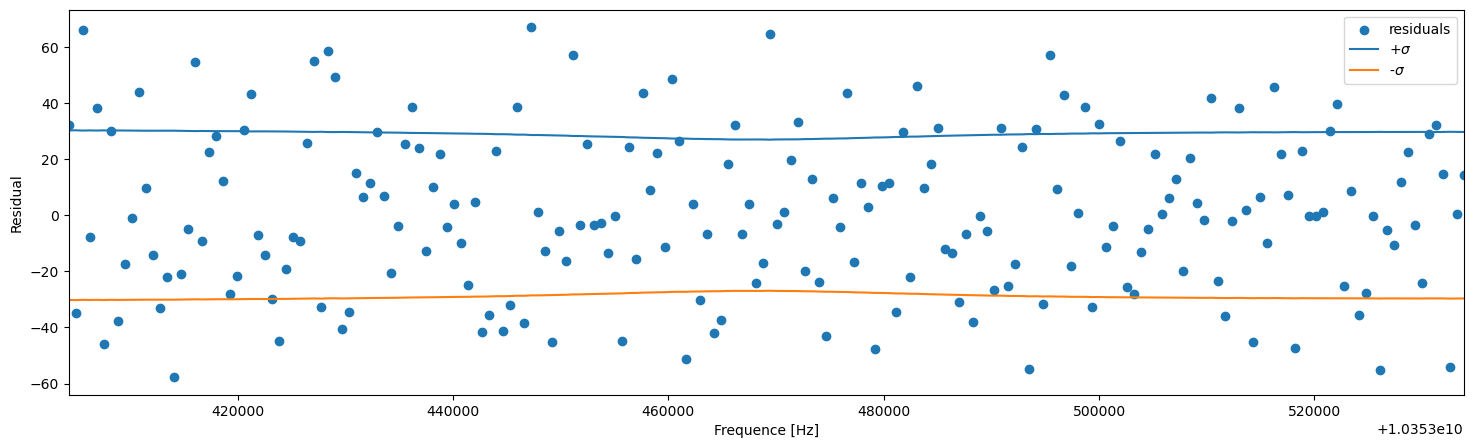

In [7]:
x0_max = freq[np.argmax(mu_fit)]

res_sig = fits.fit_sig(x=freq, y=fft, w=weights, x_0=x0_max,
                       init_params=bkg_params, signal=fits.signal_gauss, par_vary=False)
fits.plot_fit(freq, fft, weights, res_sig)

It is important to note that, if you let every parameter vary, the fit does not converge for $\mu$ and it gets stuck on the starting value.

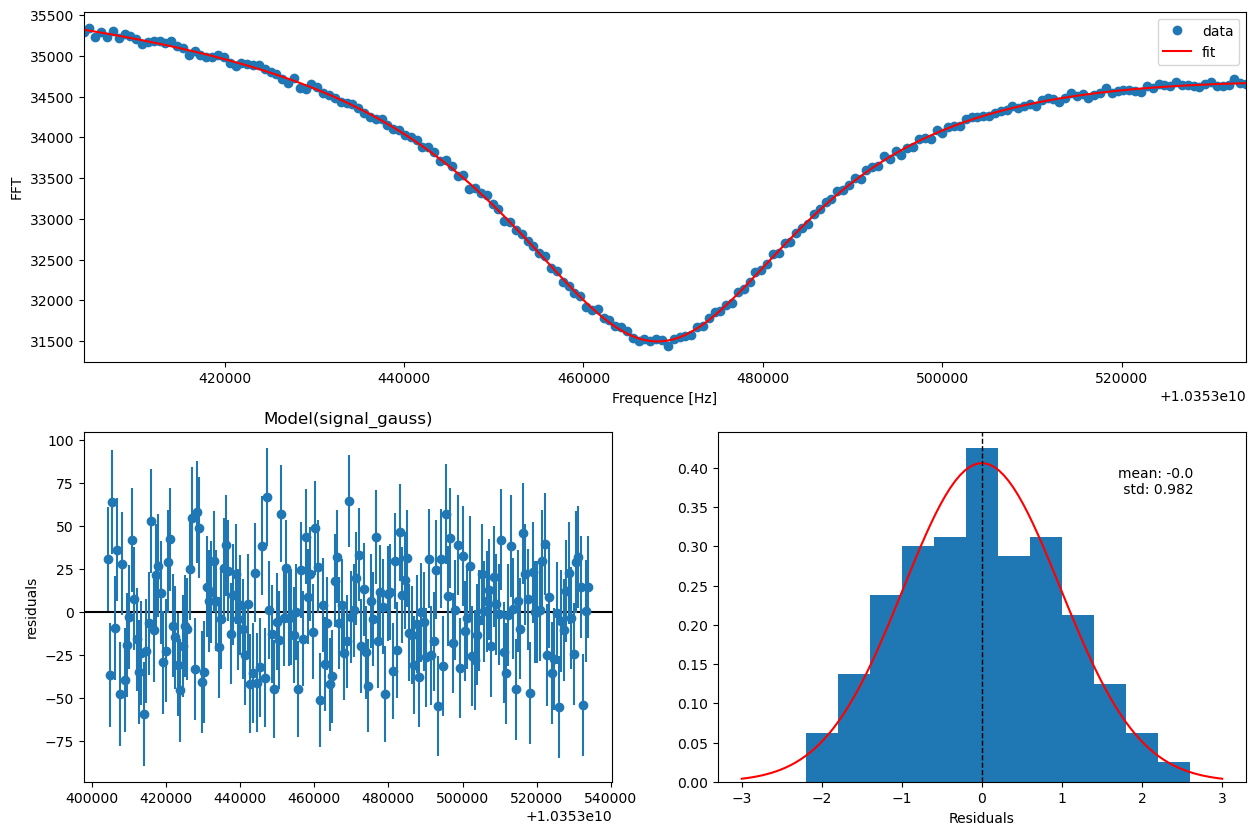

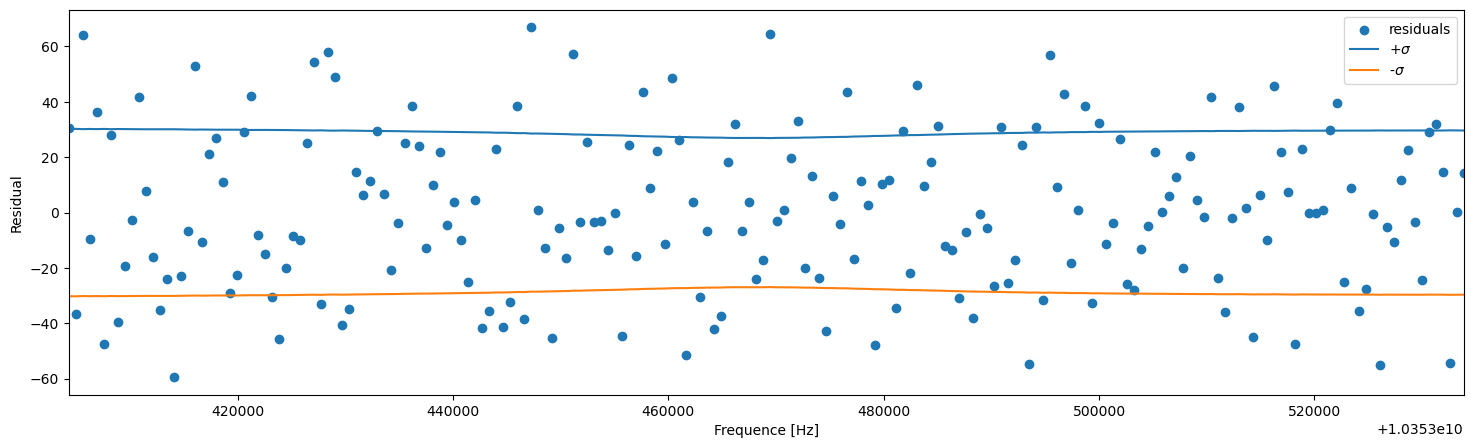

In [8]:
res_sig = fits.fit_sig(x=freq, y=fft, w=weights, x_0=x0_max,
                       init_params=bkg_params, signal=fits.signal_gauss, par_vary=True, mu_init=0.1)
fits.plot_fit(freq, fft, weights, res_sig)

## 3. Statistical Analysis <a name="stats"></a>

### 3.1. Significance <a name="stats_sign"></a>

Assuming the presence of a signal, we will now compute its significance. As more thoroughly explained in the "Statistics" notebook, this quantity is computed from the p-value of the observed likelihood ratio

$$q_0^{obs} = -2 \cdot \log \left( \cfrac{\mathcal{L} \left(Data | 0, \hat{\theta}_0 \right)}{\mathcal{L} \left(Data | \hat{\mu}, \hat{\theta}_\hat{\mu} \right)}\right)$$

with respect to a distribution ob of $q_0$ obtained from toy datasets.  
Every recorded frequency is investigated as a possible center of the signal, $x_0$. 

In [9]:
z_tot, _ = stat.stat_test(run=395, x_0=freq, mu_fix=0,
                          signal=fits.signal_gauss, n_toy=1000,
                          calc_z=True, calc_CI=False, draw=False, verbose=False, path='db/')

Dataset loaded: db/AnalyzedDataFFT_Run_395_sliced.xlsx
Cavity frequency: 10353468841.0 Hz
fft subrun:2
Step: 20
Step: 40
Step: 60
Step: 80
Step: 100
Step: 120
Step: 140
Step: 160
Step: 180
Step: 200


The highest significance is 1.32 found at 10353412109.375 Hz


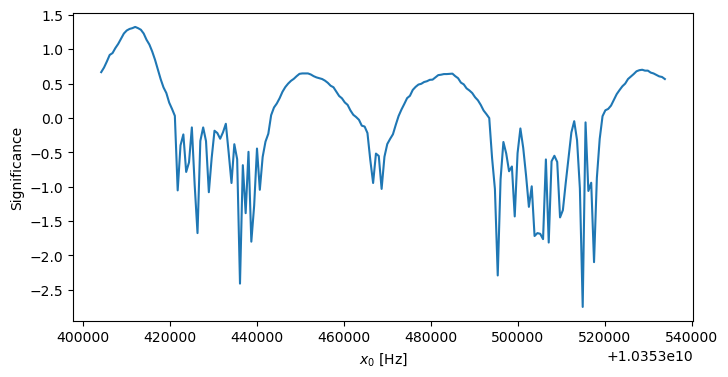

In [17]:
fig = plt.figure(figsize=(8, 4))
plt.plot(freq, z_tot)
plt.xlabel(r'$x_0$ [Hz]')
plt.ylabel('Significance')

max_z = np.max(z_tot)
freq_max_z = freq[z_tot == max_z].values

print("The highest significance is", round(max_z, 2), "found at", freq_max_z[0], "Hz")

In [30]:
print(z_tot)

[ 6.65078946e-01  7.32276205e-01  8.20379146e-01  9.15365088e-01
  9.42376333e-01  1.01522203e+00  1.07583736e+00  1.15034938e+00
  1.22652812e+00  1.27023762e+00  1.29303198e+00  1.30468539e+00
  1.32250514e+00  1.30468539e+00  1.28155157e+00  1.22652812e+00
  1.13589622e+00  1.06693763e+00  9.66088297e-01  8.45198535e-01
  7.03089460e-01  5.62170292e-01  4.42676144e-01  3.61133034e-01
  2.22403227e-01  1.30715968e-01  3.00840766e-02 -1.05374430e+00
 -3.98855066e-01 -2.40426031e-01 -7.85773832e-01 -6.46431416e-01
 -1.38304208e-01 -9.74113877e-01 -1.67466489e+00 -3.34503036e-01
 -1.38304208e-01 -3.37155077e-01 -1.08031934e+00 -5.82841507e-01
 -1.86567182e-01 -2.19834564e-01 -3.02855481e-01 -2.09574223e-01
 -8.53287949e-02 -5.04371986e-01 -9.46291358e-01 -3.82622075e-01
 -6.00759774e-01 -2.40891555e+00 -6.87131287e-01 -1.38517161e+00
 -4.93017814e-01 -1.79911811e+00 -1.27587418e+00 -4.45442506e-01
 -1.04504970e+00 -5.68051498e-01 -3.45125531e-01 -2.30118101e-01
  4.01168102e-02  1.50969

The highest significance found is too small to refute the *background-only* hypothesis.

Here are three examples of the likelihood ratio distribution obtained from toy data for different choices of $x_0$:

- the frequency corresponding to the maximum value of $\hat{\mu}$
- the center of the cavity
- a secondary peak of $\hat{\mu}$

Dataset loaded: db/AnalyzedDataFFT_Run_395_sliced.xlsx
Cavity frequency: 10353468841.0 Hz
fft subrun:2


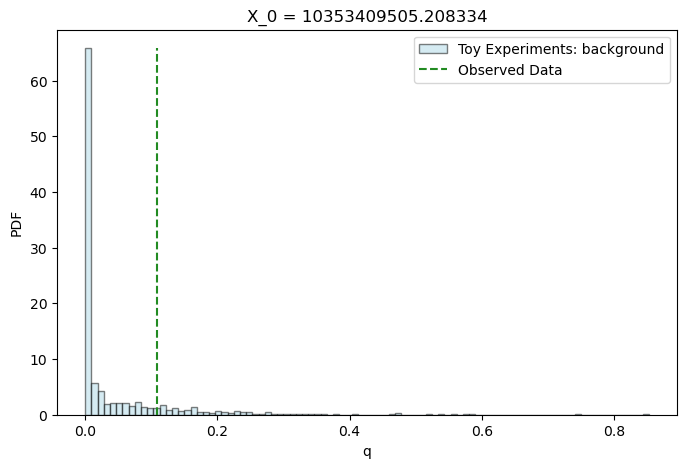

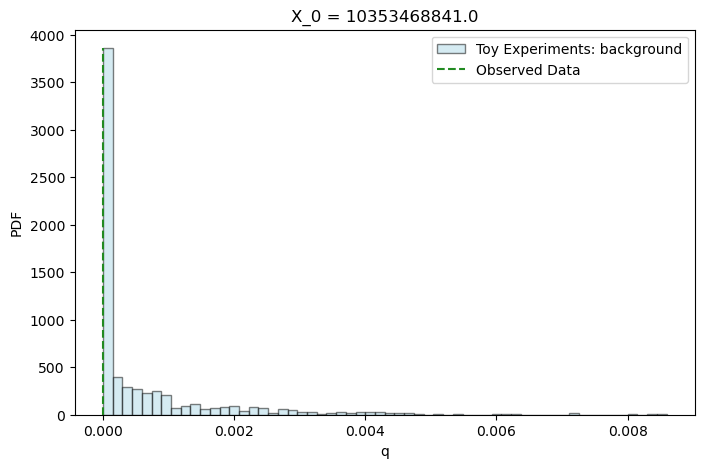

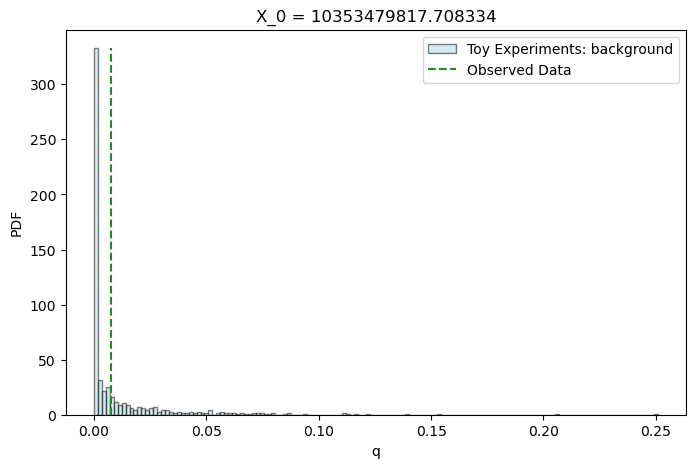

In [18]:
z_example, _ = stat.stat_test(run=395, x_0=[x0_max, center, freq[116]], mu_fix=0,
                              signal=fits.signal_gauss, n_toy=1000,
                              calc_z=True, calc_CI=False, draw=True, verbose=False, path='db/')

### 3.2. Confidence Interval <a name="stats_ci"></a>

We are now interested in setting a limit on the strength of the signal, thus computing $\mu^{95\% CL}$. It would not be correct *a priori* to do both this and the previous staistical test, as they start from different assumptions on the presence of the signal or lack thereof; we will still be showing both for a more complete discussion.  

Due to computational constraints, $\mu^{95\% CL}$ is computed by scanning values of $\mu$ with a step of $\Delta \mu = 5$ and taking 1 in every 5 bins as a possible $x_0$. Given that the expected standard deviation of the signal is 14 bins, it is still an acceptable level of precision.  

In [20]:
_, muCI_tot = stat.stat_test(run=395, x_0=freq[range(0, 200, 5)].values, mu_fix=60,
                             signal=fits.signal_gauss, n_toy=1000,
                             calc_z=False, calc_CI=True, draw=False, verbose=False, path='db/')

Dataset loaded: db/AnalyzedDataFFT_Run_395_sliced.xlsx
Cavity frequency: 10353468841.0 Hz
fft subrun:2
Step: 20
Step: 40


Text(0, 0.5, '$\\mu^{95\\%CL}$')

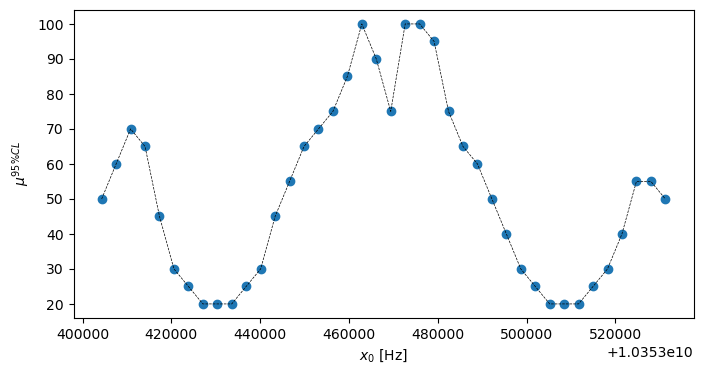

In [28]:
fig = plt.figure(figsize=(8, 4))
plt.scatter(freq[range(0, 200, 5)].values, muCI_tot, marker='o')
plt.plot(freq[range(0, 200, 5)].values, muCI_tot, linestyle='dashed', color="black", linewidth=0.5)
plt.xlabel(r'$x_0$ [Hz]')
plt.ylabel(r'$\mu^{95\%CL}$')

In [29]:
print(muCI_tot)

[ 50.  60.  70.  65.  45.  30.  25.  20.  20.  20.  25.  30.  45.  55.
  65.  70.  75.  85. 100.  90.  75. 100. 100.  95.  75.  65.  60.  50.
  40.  30.  25.  20.  20.  20.  25.  30.  40.  55.  55.  50.]


As for the previous test, we will now show some examples of the distributions of the likelihood ratio

$$q^{obs} \left( \mu \right) = -2 \cdot \log \left( \cfrac{\mathcal{L} \left(Data | \mu, \hat{\theta}_{\mu} \right)}{\mathcal{L} \left(Data | \hat{\mu}, \hat{\theta}_\hat{\mu} \right)}\right)$$

used to compute $\mu^{95\% CL}$, from toy datasets obtained both from *background-only* and *background+signal* hypotheses. Forsimplicity, the choice of $x_0$ will be the same of before.

Dataset loaded: db/AnalyzedDataFFT_Run_395_sliced.xlsx
Cavity frequency: 10353468841.0 Hz
fft subrun:2
Mu:  60    q(mu)_obs = 81.07271738420968 
p_mu = 0.054   p_b = 0.863   ratio = 0.06257242178447277 

Mu:  65.0    q(mu)_obs = 95.65882482989855 
p_mu = 0.037   p_b = 0.863   ratio = 0.04287369640787949 



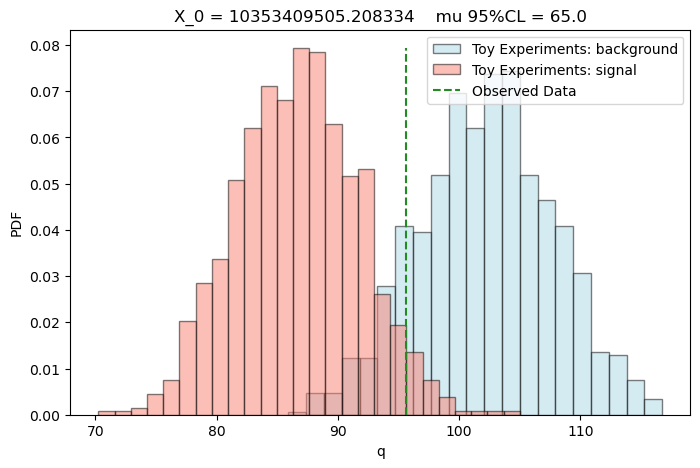

Dataset loaded: db/AnalyzedDataFFT_Run_395_sliced.xlsx
Cavity frequency: 10353468841.0 Hz
fft subrun:2
Mu:  80    q(mu)_obs = 243.40080667938014 
p_mu = 0.013   p_b = 0.312   ratio = 0.041666666666666664 



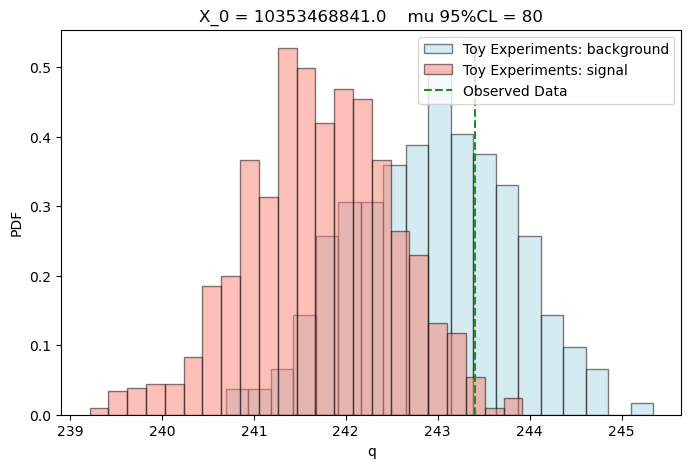

Dataset loaded: db/AnalyzedDataFFT_Run_395_sliced.xlsx
Cavity frequency: 10353468841.0 Hz
fft subrun:2
Mu:  95    q(mu)_obs = 327.7419683283117 
p_mu = 0.02   p_b = 0.721   ratio = 0.027739251040221916 

Mu:  90.0    q(mu)_obs = 294.0667802114465 
p_mu = 0.028   p_b = 0.721   ratio = 0.03883495145631068 

Mu:  85.0    q(mu)_obs = 262.2088826391662 
p_mu = 0.032   p_b = 0.719   ratio = 0.044506258692628656 



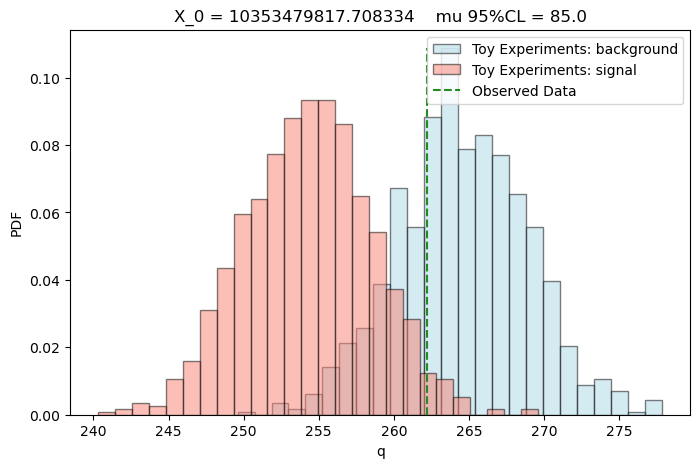

In [25]:
_, muCI_example1 = stat.stat_test(run=395, x_0=[x0_max], mu_fix=60,
                                  signal=fits.signal_gauss, n_toy=1000,
                                  calc_z=False, calc_CI=True, draw=True, verbose=True, path='db/')
_, muCI_example2 = stat.stat_test(run=395, x_0=[center], mu_fix=80,
                                  signal=fits.signal_gauss, n_toy=1000,
                                  calc_z=False, calc_CI=True, draw=True, verbose=True, path='db/')
_, muCI_example3 = stat.stat_test(run=395, x_0=[freq[116]], mu_fix=95,
                                  signal=fits.signal_gauss, n_toy=1000,
                                  calc_z=False, calc_CI=True, draw=True, verbose=True, path='db/')